# Abstract: Predict whether income exceeds
# 50K/yr based on census data. Also known as "Census Income" dataset.

In [1]:
#https://lwmachinelearning.wordpress.com/portfolio/adults-data-set/

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn.linear_model as skl
import matplotlib.pyplot as plt

sb.set_style("darkgrid")

In [3]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
pwd

'C:\\Users\\Thor 3\\Desktop\\data_science\\Adult data set'

In [5]:
df = pd.read_csv('adult.data')

In [6]:
#df.to_excel('the_datatbl.xlsx')

In [7]:
columns= df.columns # df.column -->its an index so we need column.values

In [8]:
columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [9]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df[' Bachelors'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df[' Bachelors'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Bachelors, dtype: int64

In [14]:
df[' United-States'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [15]:
df[' <=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [16]:
df[' 0'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [17]:
print(df['39'].value_counts())
print(df['39'].unique())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: 39, Length: 73, dtype: int64
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


In [18]:
df['39'].describe() #this is the age

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: 39, dtype: float64

In [19]:
df.rename(columns={'39':'Age'},inplace=True)

In [20]:
for i in range(len(columns)):
    columns.values[i]=columns.values[i].replace(' ','')

In [21]:
columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [22]:
#df.columns=columns

In [23]:
df.head()

,Age,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [24]:
df.columns

Index(['Age', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [25]:
df.rename(columns={'39':'Age'},inplace=True)

In [26]:
df.columns

Index(['Age', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [27]:
df[' 77516'].describe() # final weights fnlwgt

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name:  77516, dtype: float64

In [28]:
df.rename(columns={' 77516':'fnlwgt'},inplace=True)

In [29]:
#sb.pairplot(df.dropna())

In [30]:
df.head()

,Age,State-gov,fnlwgt,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [31]:
df[' 13'].describe() # education_num  - Numeric education level

count    32560.000000
mean        10.080590
std          2.572709
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name:  13, dtype: float64

In [32]:
df.rename(columns={' 13':'education_num'},inplace=True)

In [33]:
df.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:
df[' 2174'].describe() # capital_gain

count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name:  2174, dtype: float64

In [35]:
df.rename(columns={' 2174':'capital_gain'},inplace=True)

In [36]:
df.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gain,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [37]:
df[' 0'].describe() #capital_loss

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name:  0, dtype: float64

In [38]:
df.rename(columns={' 0':'capital_loss'},inplace=True)

In [39]:
df[' 40'].describe() # hours_per_week

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name:  40, dtype: float64

In [40]:
df.rename(columns={' 40':'hours_per_week','United-States':'Country','Not-in-family':'Relationship'},inplace=True)


In [41]:
df.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gain,capital_loss,hours_per_week,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [42]:
#sb.factorplot('<=50K',data=df,hue='White')

In [43]:
df2 = df.copy(deep=True)

In [44]:
fif = pd.get_dummies(df2[' <=50K'])

In [45]:
fif.head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
type(fif[' >50K'][1])

numpy.uint8

In [47]:
def fifty(val):
    return val == ' <=50K'

In [48]:
#df2['<=50K']

In [49]:
#titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
df2['less than 50K'] = df2[[' <=50K']].apply(fifty,axis=1)

In [50]:
df2['less than 50K'].value_counts()

True     24719
False     7841
Name: less than 50K, dtype: int64

In [51]:
df2.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,True
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,True
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,True
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,True
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,True


In [52]:
df2.tail()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,True
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,False
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,True
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,True
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,False


In [53]:
df2[' <=50K'][32559]

' >50K'

In [54]:
df2[' <=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [55]:
df2['less than 50K'].value_counts()

True     24719
False     7841
Name: less than 50K, dtype: int64

In [56]:
df2['less than 50K'] = df2['less than 50K'].astype(int)

In [57]:
df2['less than 50K'].value_counts()

1    24719
0     7841
Name: less than 50K, dtype: int64

In [58]:
df2.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,White,Male,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1


In [59]:
df2['less than 50K'].value_counts()

1    24719
0     7841
Name: less than 50K, dtype: int64

In [60]:
df2[' White'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  White, dtype: int64

In [61]:
df2[' White'].isna().value_counts()

False    32560
Name:  White, dtype: int64

In [62]:
df2.rename(columns={' White':'Ethnicity',' Male':'Gender','':'Occupation'},inplace=True)

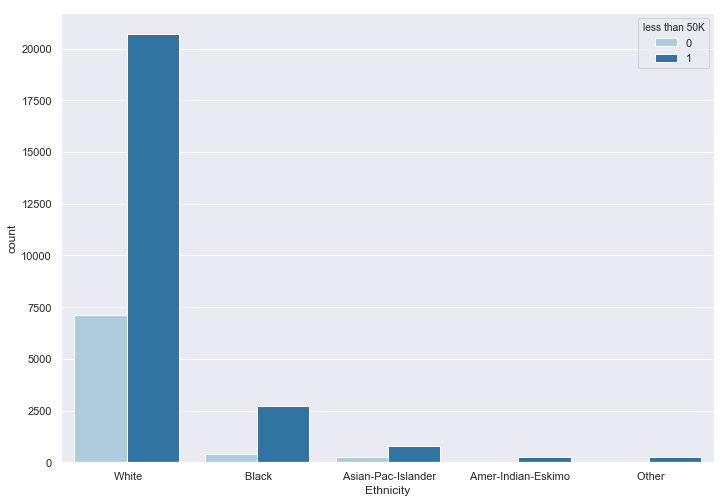

In [63]:
sb.countplot('Ethnicity',data=df2,hue='less than 50K',palette='Paired')

In [64]:
#sb.countplot('Age',data=df2,hue='less than 50K',palette='rocket')

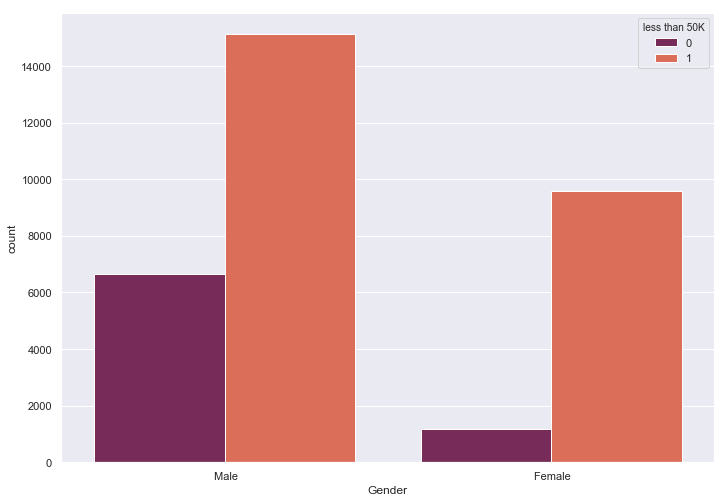

In [65]:
sb.countplot('Gender',data=df2,hue='less than 50K',palette='rocket')

C:\Users\Thor 3\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


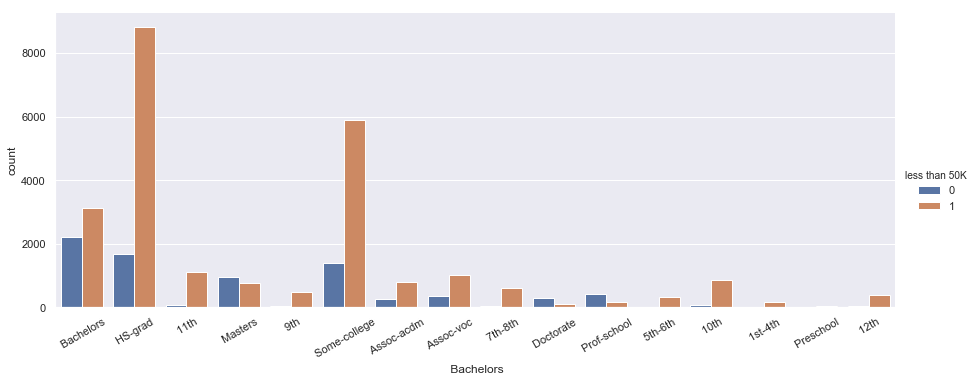

In [66]:
#g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
bachelors = sb.factorplot(' Bachelors',data=df2,kind="count",hue='less than 50K',aspect=2.5)
bachelors.set_xticklabels(rotation=30)

In [67]:
df2.columns
df2.head()

,Age,State-gov,fnlwgt,Bachelors,education_num,Never-married,Adm-clerical,Not-in-family,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1


In [68]:
df2.rename(columns={' Not-in-family':'Relationship',' Never-married':'Marital',' State-gov':'Workclass',' Adm-clerical':'Occupation',' Bachelors':'Bachelors'},inplace=True)
df2.head()

,Age,Workclass,fnlwgt,Bachelors,education_num,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1


C:\Users\Thor 3\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


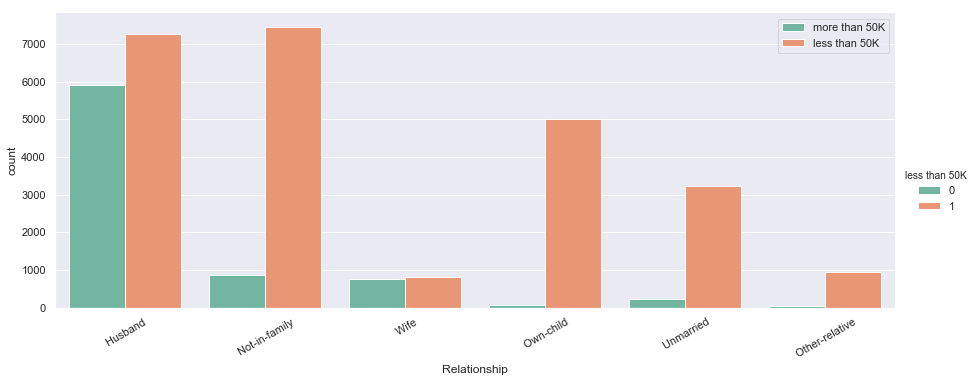

In [69]:
fam_rel = sb.factorplot('Relationship',data=df2,kind="count",hue='less than 50K',aspect=2.5,palette='Set2')
fam_rel.set_xticklabels(rotation=30)
plt.legend(labels=['more than 50K', 'less than 50K'])
plt.show(fam_rel)


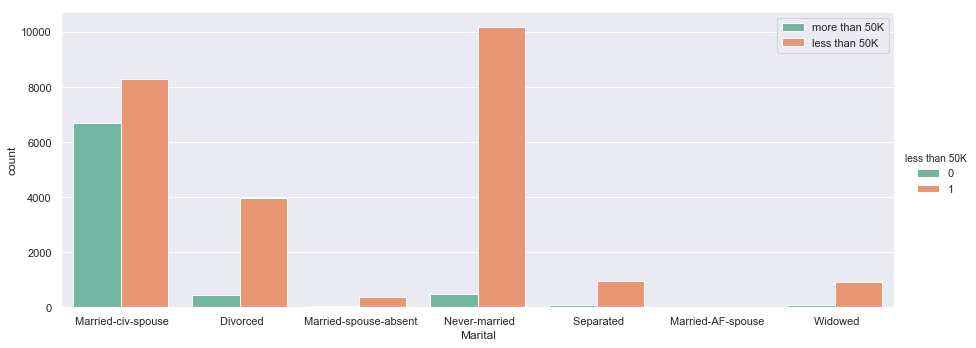

In [70]:
marital = sb.factorplot('Marital',data=df2,kind="count",hue='less than 50K',aspect=2.5,palette='Set2')
fam_rel.set_xticklabels(rotation=30)
plt.legend(labels=['more than 50K', 'less than 50K'])
plt.show(marital)

C:\Users\Thor 3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


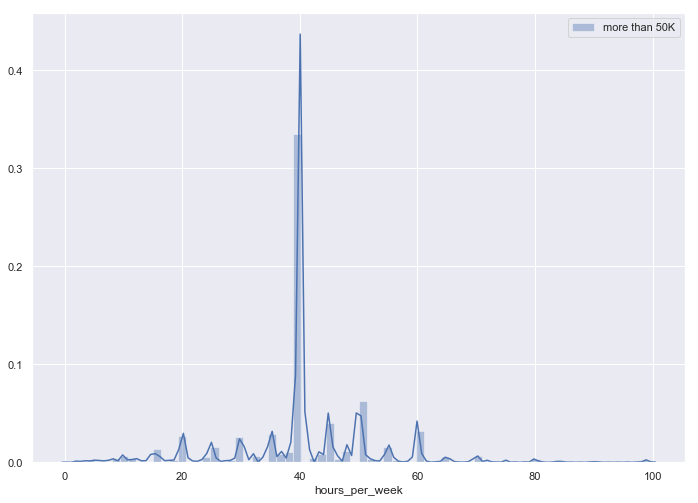

In [71]:
hour_p_w = sb.distplot(df2['hours_per_week'],bins=70)
#hour_p_w.set_xticklabels(rotation=45)
plt.legend(labels=['more than 50K', 'less than 50K'])
plt.show(hour_p_w)

In [72]:
cols = df2.columns.values

In [73]:
cols

array(['Age', 'Workclass', 'fnlwgt', 'Bachelors', 'education_num',
       'Marital', 'Occupation', 'Relationship', 'Ethnicity', 'Gender',
       'capital_gain', 'capital_loss', 'hours_per_week', ' United-States',
       ' <=50K', 'less than 50K'], dtype=object)

In [74]:
for i in range(len(cols)):
    txt = cols[i]
    print(df2[txt].value_counts(),end='\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Bachelors, dtype: int6

In [75]:
df2[df2['Workclass']==' ?']

,Age,Workclass,fnlwgt,Bachelors,education_num,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,0
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,1
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,1
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,0
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,1
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,0
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,1


In [76]:

unk = df2[['Workclass','Occupation']]

In [77]:
unk

,Workclass,Occupation
0,Self-emp-not-inc,Exec-managerial
1,Private,Handlers-cleaners
2,Private,Handlers-cleaners
3,Private,Prof-specialty
4,Private,Exec-managerial
...,...,...
32555,Private,Tech-support
32556,Private,Machine-op-inspct
32557,Private,Adm-clerical
32558,Private,Adm-clerical


In [78]:
unk[unk['Workclass']==' ?' ] 

,Workclass,Occupation
26,?,?
60,?,?
68,?,?
76,?,?
105,?,?
...,...,...
32529,?,?
32530,?,?
32538,?,?
32540,?,?


In [79]:
unk3 = unk[unk['Occupation']==' ?' ] 

In [80]:
unk3['Workclass'].unique()


array([' ?', ' Never-worked'], dtype=object)

In [81]:
nev_w = unk3[unk3['Workclass']==' Never-worked' ]

In [82]:
indxs_n_w = nev_w.index

In [83]:
indxs_n_w

Int64Index([5360, 10844, 14771, 20336, 23231, 32303, 32313], dtype='int64')

In [84]:
df2.loc[indxs_n_w]

,Age,Workclass,fnlwgt,Bachelors,education_num,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K,1
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,1
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K,1
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K,1
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K,1
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K,1


In [85]:
df2[df2['Workclass']==' Never-worked']

,Age,Workclass,fnlwgt,Bachelors,education_num,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,1
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K,1
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,1
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K,1
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K,1
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K,1
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K,1


In [86]:
print (df2['Occupation'].value_counts(),'\n\n',df2['Workclass'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [87]:
unk = df2[['Workclass','Occupation','Bachelors','hours_per_week']]
unk.head()

,Workclass,Occupation,Bachelors,hours_per_week
0,Self-emp-not-inc,Exec-managerial,Bachelors,13
1,Private,Handlers-cleaners,HS-grad,40
2,Private,Handlers-cleaners,11th,40
3,Private,Prof-specialty,Bachelors,40
4,Private,Exec-managerial,Masters,40


In [88]:
unk[unk['Workclass']==' Never-worked']

,Workclass,Occupation,Bachelors,hours_per_week
5360,Never-worked,?,10th,40
10844,Never-worked,?,7th-8th,35
14771,Never-worked,?,10th,30
20336,Never-worked,?,11th,10
23231,Never-worked,?,Some-college,40
32303,Never-worked,?,HS-grad,40
32313,Never-worked,?,Some-college,4


In [89]:
unk[unk['Workclass']==' Never-worked']['Workclass']

5360      Never-worked
10844     Never-worked
14771     Never-worked
20336     Never-worked
23231     Never-worked
32303     Never-worked
32313     Never-worked
Name: Workclass, dtype: object

In [90]:
unk.loc[unk['Workclass']==' Never-worked']=' Private'

C:\Users\Thor 3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [91]:
#df2.loc[df2['Workclass']==' Never-worked']=' Private'
df2['Workclass'].replace(' ?',' Private',inplace=True)

In [92]:
print (df2['Occupation'].value_counts(),'\n\n',df2['Workclass'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

  Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [93]:
#df2.loc[df2['Workclass']==' ?',['Workclass']]=' Private'
#df2.loc[df2['Occupation']==' ?',['Occupation']]=' Other-service'
#df3['Marital'].replace(' Private','Private',inplace=True)
df2['Workclass'].replace(' ?',' Private',inplace=True)
df2['Occupation'].replace(' ?',' Other-service',inplace=True)

In [94]:
print (df2['Occupation'].value_counts(),'\n\n',df2['Workclass'].value_counts())

 Other-service        5138
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

  Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [95]:
#df2.loc[df2['Workclass']==' Private',['Workclass']]='Private'
df2['Workclass'].replace(' Private','Private',inplace=True)

In [96]:
print (df2['Occupation'].value_counts(),'\n\n',df2['Workclass'].value_counts())

 Other-service        5138
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

 Private              24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [97]:
df2['less than 50K'].value_counts()

1    24719
0     7841
Name: less than 50K, dtype: int64

In [98]:
#df2.drop([' <=50K'],axis=1,inplace=True)

In [99]:
df2.head()

,Age,Workclass,fnlwgt,Bachelors,education_num,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,United-States,<=50K,less than 50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1


In [100]:
df2.shape

(32560, 16)

In [101]:
df[' <=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name:  <=50K, dtype: int64

In [102]:
df2['less than 50K'].value_counts()

1    24719
0     7841
Name: less than 50K, dtype: int64

In [103]:
df2.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Bachelors', 'education_num', 'Marital',
       'Occupation', 'Relationship', 'Ethnicity', 'Gender', 'capital_gain',
       'capital_loss', 'hours_per_week', ' United-States', ' <=50K',
       'less than 50K'],
      dtype='object')

# # final df

In [104]:
df3 = df2.copy(deep=True)

In [105]:
df3.drop(['fnlwgt','education_num'],axis=1,inplace=True)

In [106]:
df3.drop(' <=50K',axis=1,inplace=True)

In [107]:
df3['Workclass'].value_counts()

Private              24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [108]:
#df.rename(columns={'39':'Age'},inplace=True)
df3.rename(columns={' United-States':'Country'},inplace=True)

In [109]:
df3.head(1)

,Age,Workclass,Bachelors,Marital,Occupation,Relationship,Ethnicity,Gender,capital_gain,capital_loss,hours_per_week,Country,less than 50K
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1


In [110]:
#final_data = pd.get_dummies(loans,columns=['purpose'],drop_first=True)
df4 = pd.get_dummies(df3,columns=['Relationship','Workclass','Bachelors','Marital','Occupation','Ethnicity','Gender','Country'],drop_first=True)

# df4

In [111]:
df4.head()

,Age,capital_gain,capital_loss,hours_per_week,less than 50K,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,0,0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,40,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,0,0,40,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,0,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [112]:
#df4.info()

In [113]:
df4.columns[2:4]

Index(['capital_loss', 'hours_per_week'], dtype='object')

In [114]:
df4['capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [115]:
df4.head(1)

,Age,capital_gain,capital_loss,hours_per_week,less than 50K,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,0,0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [116]:
#df4.columns

# HYPTHESYS AND MODEL BUILDING FROM HERE + CROSS VALIDATION

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
from sklearn.ensemble import BaggingClassifier

In [118]:
X = df4.drop('less than 50K',axis=1)
y = df4['less than 50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [119]:
X_2 = pd.concat([X_train, y_train], axis=1)

In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [121]:
kf = KFold(n_splits=5)

In [122]:
dtree = DecisionTreeClassifier()

In [123]:
y_train.value_counts()

1    17324
0     5468
Name: less than 50K, dtype: int64

In [124]:
#X.columns

In [125]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
scores_dt = cross_val_score(dtree, X_train, y_train, cv=5)
print(scores_dt)
print('scores mean =',scores_dt.mean())

[0.81728449 0.82342619 0.81487168 0.81285652 0.81983761]
scores mean = 0.8176552986067535


In [127]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf_dt = GridSearchCV(DecisionTreeClassifier(), tree_para,verbose=1, cv=5)
clf_dt.fit(X_train, y_train)
## ALREADY TRAINED , saved in pickle --> model.obj

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   28.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [128]:
clf_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
print('best score:',clf_dt.best_score_,'best params:',clf_dt.best_params_)

best score: 0.8559143559143559 best params: {'criterion': 'gini', 'max_depth': 9}


### testing pickling

In [130]:
import pickle
filehandler1 = open("model.obj","wb")
pickle.dump(clf_dt,filehandler1)
filehandler1.close()

In [131]:
file = open("model.obj",'rb')
object_file = pickle.load(file)
file.close()

In [132]:
object_file.best_params_

{'criterion': 'gini', 'max_depth': 9}

# cross validation with kfold

In [133]:
k=1
for train_index, test_index in kf.split(X_train):
    X_train2, X_test2 = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train2, y_test2 = y_train.iloc[train_index], y_train.iloc[test_index]
    dtree.fit(X_train2,y_train2)
    predictions_dt = dtree.predict(X_test2)
    print('#',k,' ',classification_report(y_test2,predictions_dt))
    print(confusion_matrix(y_test2,predictions_dt))
    scores_dt = cross_val_score(dtree, X_train2, y_train2, cv=5)
    print(scores_dt)
    print('scores mean =',scores_dt.mean())
    k+=1
    

# 1                 precision    recall  f1-score   support

           0       0.61      0.65      0.63      1085
           1       0.89      0.87      0.88      3474

   micro avg       0.82      0.82      0.82      4559
   macro avg       0.75      0.76      0.75      4559
weighted avg       0.82      0.82      0.82      4559

[[ 702  383]
 [ 445 3029]]
[0.82835207 0.8105292  0.80970661 0.81623697 0.81568843]
scores mean = 0.816102655629158
# 2                 precision    recall  f1-score   support

           0       0.63      0.66      0.65      1107
           1       0.89      0.88      0.88      3452

   micro avg       0.82      0.82      0.82      4559
   macro avg       0.76      0.77      0.76      4559
weighted avg       0.83      0.82      0.83      4559

[[ 732  375]
 [ 428 3024]]
[0.80235746 0.80614203 0.79895776 0.81020296 0.82199671]
scores mean = 0.8079313846984734
# 3                 precision    recall  f1-score   support

           0       0.61      0.62      0

# DECISIONTREES using funciton cross_validation()

In [134]:
print(cross_val_score(DecisionTreeClassifier(random_state=1), X_train, y_train, cv=5))
print(cross_val_score(DecisionTreeClassifier(random_state=1), X_train, y_train, cv=KFold(n_splits=5)))
print(cross_val_score(DecisionTreeClassifier(random_state=1), X_train, y_train, cv=StratifiedKFold(n_splits=5)))

[0.81662645 0.82649704 0.81267822 0.8135147  0.81895984]
[0.81838122 0.82803246 0.81197894 0.81658622 0.81856077]
[0.81662645 0.82649704 0.81267822 0.8135147  0.81895984]


In [135]:
#from sklearn.metrics import classification_report,confusion_matrix

In [136]:
#predictions_dt = dtree.predict(X_test)

In [137]:
#print(classification_report(y_test,predictions_dt))

In [138]:
#print(confusion_matrix(y_test,predictions_dt))

In [139]:
#from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(dtree, X_train, y_train, cv=5)
print(scores_dt)
print('scores mean =',scores_dt.mean())

[0.81772318 0.82561965 0.8107041  0.81022378 0.8172043 ]
scores mean = 0.8162950047108801


## Bagging classifier with decisionTree

In [140]:
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=1),n_estimators=3)
bagging_model.fit(X_train2, y_train2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=3, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [141]:
bagging_model.score(X_test2,y_test2)

0.8238262395787627

In [142]:
params ={'n_estimators':[3,5,7,9,10,15,20]}

In [143]:
bagging_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=1)),param_grid = params , verbose=1)

In [144]:
bagging_gs.fit(X_train,y_train)

C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   23.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [3, 5, 7, 9, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [145]:
filehandler2 = open("bagging_gs.model","wb")
pickle.dump(bagging_gs,filehandler2)
filehandler2.close()

In [146]:
file = open("bagging_gs.model",'rb')
bagging_gs = pickle.load(file)
file.close()

In [147]:
bg_results_df=pd.DataFrame(bagging_gs.cv_results_)

C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\

In [148]:
bg_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.314885,0.009139,0.028448,0.003822,3,{'n_estimators': 3},0.829034,0.826928,0.830700,0.828887,0.001543,7,0.952481,0.951691,0.954396,0.952856,0.001135
1,0.531222,0.006393,0.034166,0.000831,5,{'n_estimators': 5},0.837457,0.831929,0.833202,0.834196,0.002364,6,0.964394,0.965579,0.966899,0.965624,0.001023
2,0.705905,0.012804,0.050296,0.000850,7,{'n_estimators': 7},0.840748,0.832193,0.846235,0.839724,0.005778,3,0.971634,0.970580,0.971835,0.971350,0.000550
3,0.919387,0.015619,0.067751,0.008182,9,{'n_estimators': 9},0.842459,0.835351,0.837151,0.838320,0.003017,4,0.974990,0.972621,0.976639,0.974750,0.001649
4,0.919133,0.039430,0.064540,0.007165,10,{'n_estimators': 10},0.841537,0.832061,0.837941,0.837180,0.003906,5,0.974529,0.974661,0.977691,0.975627,0.001461
5,1.326851,0.022962,0.092493,0.004612,15,{'n_estimators': 15},0.843117,0.837589,0.843207,0.841304,0.002627,2,0.979334,0.979202,0.980390,0.979642,0.000531
6,1.779391,0.043832,0.116492,0.006481,20,{'n_estimators': 20},0.848118,0.838379,0.845313,0.843936,0.004094,1,0.980979,0.981374,0.983219,0.981858,0.000976


In [149]:
print('best score:',bagging_gs.best_score_,'best params:',bagging_gs.best_params_)

best score: 0.8439364689364689 best params: {'n_estimators': 20}


# RandomForest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc = RandomForestClassifier(n_estimators=600)

In [152]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
forest_params = {
    'n_estimators': [100, 300, 600]
}

clf_rf = GridSearchCV(RandomForestClassifier(),param_grid = forest_params , verbose=1)

clf_rf.fit(X_train, y_train)

filehandler3 = open("RandomForest_gs.model","wb")
pickle.dump(clf_rf,filehandler3)
filehandler3.close()

In [154]:
file = open("RandomForest_gs.model",'rb')
clf_rf = pickle.load(file)
file.close()

In [155]:
#print('best score:',rfc.best_score_,'best params:',rfc.best_params_)
print('best score:',clf_rf.best_score_,'best params:',clf_rf.best_params_)

best score: 0.8474464724464724 best params: {'n_estimators': 300}


In [156]:
reusults_df=pd.DataFrame(clf_rf.cv_results_)

C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\

In [157]:
reusults_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.748989,0.043102,0.158728,0.004177,100,{'n_estimators': 100},0.850355,0.840221,0.847946,0.846174,0.004323,3,0.983678,0.983678,0.985852,0.984402,0.001025
1,6.009076,0.340327,0.708573,0.218463,300,{'n_estimators': 300},0.852724,0.840616,0.848999,0.847446,0.005064,1,0.983678,0.983678,0.985917,0.984424,0.001056
2,11.606839,0.781002,1.072227,0.081096,600,{'n_estimators': 600},0.851671,0.839168,0.848210,0.846350,0.005271,2,0.983678,0.983678,0.985917,0.984424,0.001056


# creating a cross validation set, using randomforest and visualizing with  ROC

In [158]:
#already done 
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [159]:
rfc2 = RandomForestClassifier(n_estimators=600)
rfc2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
X_test2.shape

(4558, 96)

y_score shape:  (4558, 2)


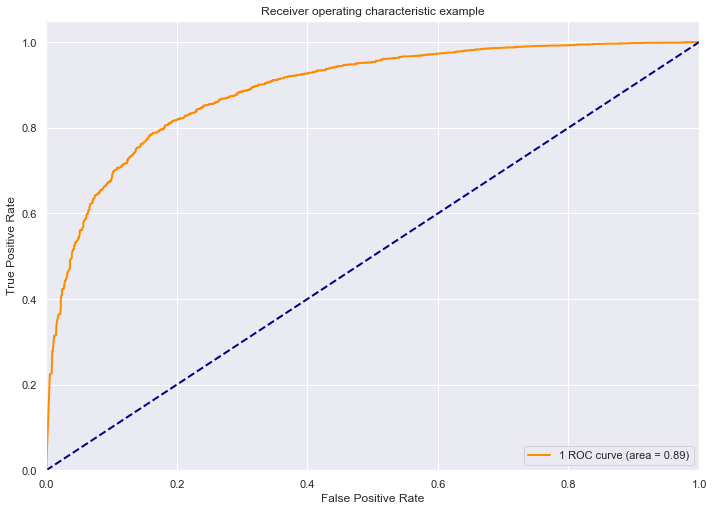

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = rfc2.predict_proba(X_test2)
print('y_score shape: ',y_score.shape,end='\n')
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test2, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='1 ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Cross validation , using only the TEST set

In [162]:
print(cross_val_score(RandomForestClassifier(n_estimators=600), X_train, y_train, cv=5))
print(cross_val_score(RandomForestClassifier(n_estimators=600), X_train, y_train, cv=KFold(n_splits=5)))
print(cross_val_score(RandomForestClassifier(n_estimators=600), X_train, y_train, cv=StratifiedKFold(n_splits=5)))

[0.84887037 0.85523141 0.84053521 0.84269416 0.85034014]
[0.84865102 0.85325729 0.83984204 0.84752084 0.85059237]
[0.84821233 0.85698618 0.84163194 0.84379114 0.84946237]


In [163]:
print(cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=5))

[0.84645756 0.85216056 0.83965782 0.84401053 0.84990125]


In [164]:
#predictions_rf = rfc.predict(X_test)

In [165]:
#print(classification_report(y_test,predictions_rf))

In [166]:
#print(confusion_matrix(y_test,predictions_rf))

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)

In [169]:
scores

array([0.84777363, 0.8556701 , 0.83987717, 0.84422993, 0.84968181])

In [170]:
scores.mean()

0.8474465274639973

# Neural Network - mlp :multi-layer perceptron

In [171]:
from sklearn.neural_network import MLPClassifier

In [172]:
X_train.shape[1]

96

In [173]:
clf_nn = MLPClassifier(random_state=1, max_iter=400).fit(X_train, y_train)

In [174]:
clf_nn2 = MLPClassifier(random_state=1, max_iter=400).fit(X_train2, y_train2)

In [175]:
#nn_predictions = clf_nn.predict(X_test)

In [176]:
#print(classification_report(y_test,nn_predictions))

In [177]:
scores_nn = cross_val_score(clf_nn, X_train, y_train, cv=5)

In [178]:
scores_nn2 = cross_val_score(clf_nn2, X_train2, y_train2, cv=5)

In [179]:
print(' scores_nn :',scores_nn,'\n','scores_nn2:',scores_nn2)

 scores_nn : [0.82934854 0.84930906 0.84536082 0.82733655 0.84617073] 
 scores_nn2: [0.83525219 0.85001371 0.8384974  0.8384531  0.84009874]


In [180]:
print(' nn mean:', scores_nn.mean(),'\n','nn2 mean:',scores_nn2.mean())

 nn mean: 0.8395051405134385 
 nn2 mean: 0.8404630271261118


In [181]:
clf_nn.n_layers_

3

In [182]:
[coef.shape for coef in clf_nn.coefs_]

[(96, 100), (100, 1)]

In [183]:
X.shape

(32560, 96)

# trying different number of hidden layers

In [184]:
clf_nn3 = MLPClassifier(random_state=1,hidden_layer_sizes=(4,), max_iter=400).fit(X_train, y_train)

In [185]:
scores_nn3 = cross_val_score(clf_nn3, X_train, y_train, cv=5)

In [186]:
scores_nn3

array([0.80960737, 0.83921913, 0.82803246, 0.82755595, 0.81281545])

In [187]:
scores_nn3.mean()

0.8234460709297263

In [188]:
nn_params ={
    'hidden_layer_sizes':[(100,),(96,),(96,96),(96,96,96)]
}

# 11 mins running time
clf_NN = GridSearchCV(MLPClassifier(random_state=1,max_iter=400),param_grid = nn_params , verbose=1)

clf_NN.fit(X_train, y_train)

filehandler4 = open("NeuralNetwrok_GsCv.model","wb")
pickle.dump(clf_NN,filehandler4)
filehandler4.close()

In [189]:
import pickle
file4 = open("NeuralNetwrok_GsCv.model",'rb')
clf_NN = pickle.load(file4)
file4.close()

In [190]:
resultsNN_df=pd.DataFrame(clf_NN.cv_results_)


C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Thor 3\Anaconda3\lib\site-packages\sklearn\

In [191]:
resultsNN_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.316673,2.041417,0.023700,0.005713,"(100,)","{'hidden_layer_sizes': (100,)}",0.838642,0.833246,0.831622,0.834503,0.003001,3,0.843425,0.842109,0.830942,0.838825,0.005600
1,6.261558,1.353359,0.036386,0.006323,"(96,)","{'hidden_layer_sizes': (96,)}",0.824559,0.831403,0.849789,0.835249,0.010653,2,0.831710,0.837436,0.854106,0.841084,0.009500
2,15.679878,6.859827,0.050846,0.009746,"(96, 96)","{'hidden_layer_sizes': (96, 96)}",0.852066,0.831535,0.842680,0.842094,0.008393,1,0.856983,0.838094,0.845551,0.846876,0.007768
3,113.927659,80.944133,0.067343,0.001754,"(96, 96, 96)","{'hidden_layer_sizes': (96, 96, 96)}",0.832851,0.816926,0.832412,0.827396,0.007406,4,0.844281,0.928327,0.845354,0.872654,0.039369


In [192]:
print('Neural Network best score:',clf_NN.best_score_,'best params:',clf_NN.best_params_)
print('Random Forest  best score:',clf_rf.best_score_,'best params:',clf_rf.best_params_)

Neural Network best score: 0.842093717093717 best params: {'hidden_layer_sizes': (96, 96)}
Random Forest  best score: 0.8474464724464724 best params: {'n_estimators': 300}


gridsearchCV neural network took 11mins, still the best score was with 2 hidden layers of 96 neurons 
Overall the bes score is from gridsearchCV RandomForests.

# Cross_val_Score

In [193]:
print(cross_val_score(MLPClassifier(random_state=1, max_iter=400), X_train, y_train, cv=5))
print(cross_val_score(MLPClassifier(random_state=1, max_iter=400), X_train, y_train, cv=KFold(n_splits=5)))
print(cross_val_score(MLPClassifier(random_state=1, max_iter=400), X_train, y_train, cv=StratifiedKFold(n_splits=5)))

[0.82934854 0.84930906 0.84536082 0.82733655 0.84617073]
[0.83658697 0.83878043 0.85015358 0.85366389 0.84664326]
[0.82934854 0.84930906 0.84536082 0.82733655 0.84617073]


y_score shape:  (4558, 2)


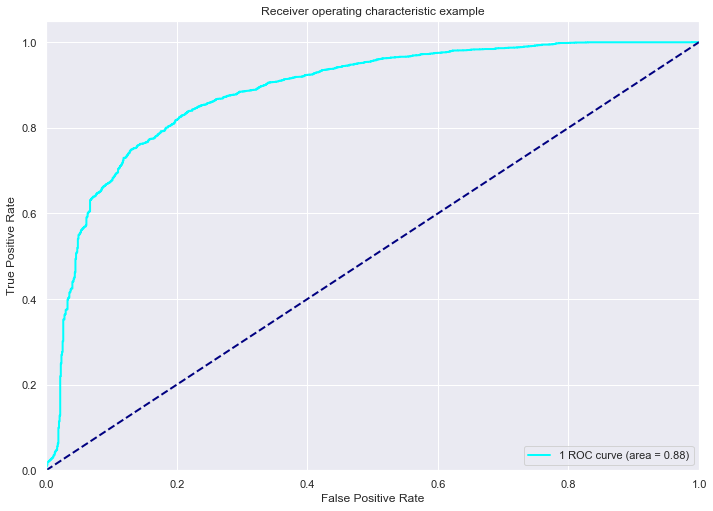

In [194]:
y_score = clf_nn2.predict_proba(X_test2)
print('y_score shape: ',y_score.shape,end='\n')
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test2, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='aqua',
         lw=lw, label='1 ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Other tests and visualizations

In [195]:
df3.columns

Index(['Age', 'Workclass', 'Bachelors', 'Marital', 'Occupation',
       'Relationship', 'Ethnicity', 'Gender', 'capital_gain', 'capital_loss',
       'hours_per_week', 'Country', 'less than 50K'],
      dtype='object')

In [196]:
#df4.columns

In [197]:
df3[['Bachelors']]

,Bachelors
0,Bachelors
1,HS-grad
2,11th
3,Bachelors
4,Masters
...,...
32555,Assoc-acdm
32556,HS-grad
32557,HS-grad
32558,HS-grad
